# Deep Learning Wide model and LSTM based USD to INR value prediction

**Description:**
The objective of the python notebook is to present the steps done towards analysing the time series data of USD to INR right from 1980 to 2017. 

The models presented here are SVR, Deep Learning models, and LSTM Model.


**Methodology:**
1. Loading required libraries
2. Data loading
3. Feature engineering and Exploratory Data analysis
4. Support Vector Regressor for prediciton of USD-INR conversion rate 
4. Deep Learning Model
5. LSTM Model


**Requirements:** This project requires **Python 3.6** and the following Python libraries installed:

- [NumPy](http://www.numpy.org/)
- [Pandas](http://pandas.pydata.org)
- [matplotlib](http://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [scikit-learn](http://scikit-learn.org/stable/)
- [DateTime](https://docs.python.org/2/library/datetime.html)
- [Keras](https://keras.io/)
- [TensorFlow](https://www.tensorflow.org/)

You will also need to have software installed to run and execute a [Jupyter Notebook](http://ipython.org/notebook.html)

If you do not have Python installed yet, it is highly recommended that you install the [Anaconda](http://continuum.io/downloads) distribution of Python, which already has the above packages and more included. 

**1. Loading Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**2. Data Loading**

In [3]:
df = pd.read_csv('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/USD_INR.csv')
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2017-08-10,64.165,63.898,64.175,63.855,0.48
2017-08-09,63.860,63.780,63.860,63.710,0.26
2017-08-08,63.692,63.750,63.785,63.615,-0.23
2017-08-07,63.840,63.710,63.865,63.648,0.26
2017-08-04,63.675,63.670,63.786,63.572,-0.05


**3. Feature Engineering and EDA**

In [4]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

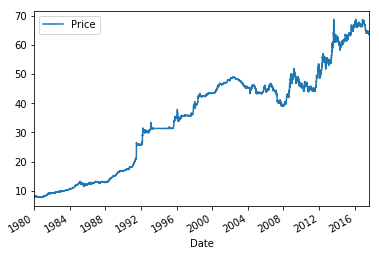

In [5]:
data = df_idx[['Price']]
data.plot(y='Price')

In [7]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))

Total data: 37 years
80 percent data = 1980 to 2009


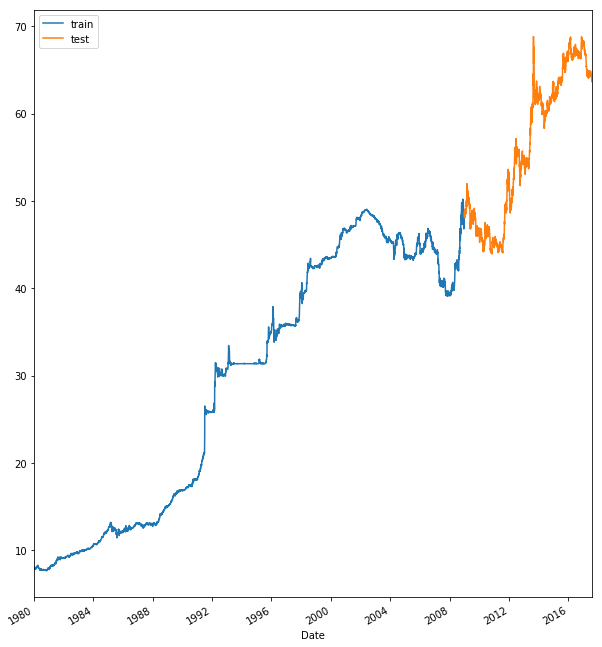

In [8]:
split_date = pd.Timestamp('01-01-2009')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [20]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


In [21]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [22]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7451 x 1)
Test size: (2245 x 1)


**4. Support Vector Regressor for prediciton of USD-INR conversion rate**


In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [24]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vasu.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


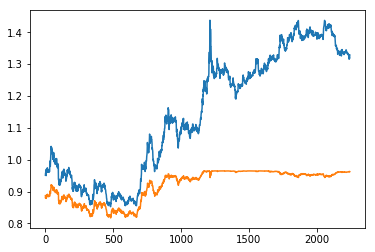

In [25]:
plt.plot(y_test)
plt.plot(y_pred)

In [26]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -0.963381


**5. Deep Learning Model**

In [29]:
!pip install keras

In [31]:
!pip install tensorflow

  Stored in directory: C:\Users\vasu.kumar\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\vasu.kumar\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\vasu.kumar\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Successfully built termcolor gast absl-py


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [33]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7451/7451 [==============================] - 1s 69us/step - loss: 0.0025
Epoch 2/20
7451/7451 [==============================] - 0s 56us/step - loss: 0.0024
Epoch 3/20
7451/7451 [==============================] - 0s 51us/step - loss: 0.0024
Epoch 4/20
7451/7451 [==============================] - 0s 58us/step - loss: 0.0024
Epoch 5/20
7451/7451 [==============================] - 1s 67us/step - loss: 0.0024
Epoch 6/20
7451/7451 [==============================] - 0s 59us/step - loss: 0.0024
Epoch 7/20
7451/7451 [==============================] - 1s 71us/step - loss: 0.0024
Epoch 8/20
7451/7451 [==============================] - 1s 68us/step - loss: 0.0024
Epoch 9/20
7451/7451 [==============================] - 0s 63us/step - loss: 0.0024
Epoch 10/20
7451/7451 [==============================] - 0s 55us/step - loss: 0.0024
Epoch 11/20
7451/7451 [================

R-Squared: -1.159593


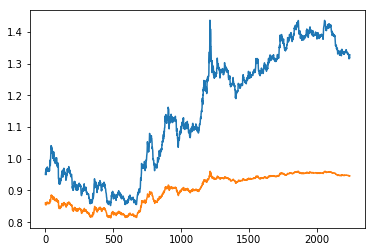

In [34]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [35]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7451/7451 [==============================] - 1s 105us/step - loss: 0.0620
Epoch 2/20
7451/7451 [==============================] - 1s 78us/step - loss: 2.5099e-05
Epoch 3/20
7451/7451 [==============================] - 1s 72us/step - loss: 1.7172e-05
Epoch 4/20
7451/7451 [==============================] - 1s 75us/step - loss: 1.3472e-05
Epoch 5/20
7451/7451 [==============================] - 1s 73us/step - loss: 1.1316e-05
Epoch 6/20
7451/7451 [==============================] - 0s 65us/step - loss: 1.3035e-05
Epoch 7/20
7451/7451 [==============================] - 1s 101us/step - loss: 1.2236e-05
Epoch 8/20
7451/7451 [==============================] - 1s 84us/step - loss: 1.1150e-05
Epoch 9/20
7451/7451 [==============================] - 0s 65us/step - loss: 1.1846e-05
Epoch 10/20
7451/7451 [==============================] - 1s 106us/step - loss: 1.4702e-05
Epoch 11/20
7451/7451 [==============================] - 1s 75us/step - loss: 1.6433e-05
Epoch 12/20
7451/7451 [========

R-Squared: 0.973984


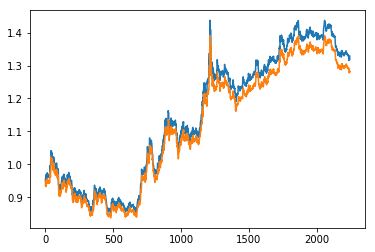

In [36]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [46]:
train_sc_df

,Y,X_1
Date,,
1980-01-02,0.007526,NaN
1980-01-03,0.006350,0.007526
1980-01-04,0.008702,0.006350
1980-01-07,0.008702,0.008702
1980-01-08,0.008702,0.008702
1980-01-09,0.007526,0.008702
1980-01-10,0.007526,0.007526
1980-01-11,0.008231,0.007526
1980-01-14,0.008231,0.008231


In [47]:
train_sc

array([[0.00752587],
       [0.00634995],
       [0.00870179],
       ...,
       [0.95037629],
       [0.96284102],
       [0.9658984 ]])

In [49]:
X_train

array([[0.00752587],
       [0.00634995],
       [0.00870179],
       ...,
       [0.95531515],
       [0.95037629],
       [0.96284102]])

In [50]:
y_train

array([[0.00634995],
       [0.00870179],
       [0.00870179],
       ...,
       [0.95037629],
       [0.96284102],
       [0.9658984 ]])

In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [52]:
exchange_data = pd.read_csv('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/USD_INR.csv')
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

In [53]:
ind_exchange_data.head()

,Price,Open,High,Low,Change %
Date,,,,,
2017-08-10,64.165,63.898,64.175,63.855,0.48
2017-08-09,63.860,63.780,63.860,63.710,0.26
2017-08-08,63.692,63.750,63.785,63.615,-0.23
2017-08-07,63.840,63.710,63.865,63.648,0.26
2017-08-04,63.675,63.670,63.786,63.572,-0.05


In [54]:
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()

,Change %,High,Low,Open,Price
Date,,,,,
1980-01-02,0.00,8.00,8.00,8.00,8.00
1980-01-03,-0.63,7.95,7.95,7.95,7.95
1980-01-04,1.26,8.05,8.05,8.05,8.05
1980-01-07,0.00,8.05,8.05,8.05,8.05
1980-01-08,0.00,8.05,8.05,8.05,8.05


In [55]:
df = data_frame[["Price"]]

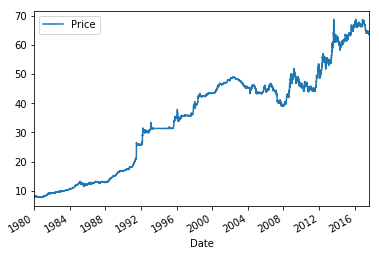

In [56]:
df.plot()

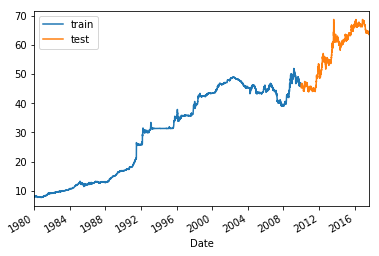

In [57]:
split_date = pd.Timestamp('01-01-2010')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [58]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [59]:
#NON Shifted ANN

In [60]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [62]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [133]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
7712/7712 [==============================] - 9s 1ms/step - loss: 1.7056e-05
Epoch 2/200
7712/7712 [==============================] - 7s 972us/step - loss: 1.7798e-04
Epoch 3/200
7712/7712 [==============================] - 8s 1ms/step - loss: 9.5291e-05
Epoch 00003: early stopping


In [134]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

The R2 score on the Train set is:	0.894
The Adjusted R2 score on the Train set is:	0.894

The R2 score on the Test set is:	0.861
The Adjusted R2 score on the Test set is:	0.861


In [135]:
model.save('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/ANN_NonShift.h5')

**6. LSTM Model**

In [136]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [147]:
#LSTM

from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=2, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Epoch 1/2
7712/7712 [==============================] - 19s 2ms/step - loss: 1.3249e-05
Epoch 2/2
7712/7712 [==============================] - 18s 2ms/step - loss: 9.9098e-05
The R2 score on the Train set is:	0.929
The Adjusted R2 score on the Train set is:	0.929

The R2 score on the Test set is:	0.901
The Adjusted R2 score on the Test set is:	0.901


In [148]:
model_lstm.save('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/LSTM_NonShift.h5')

In [149]:
#Predictions made by each Model

In [150]:
model_ann = load_model('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/ANN_NonShift.h5')
model_lstm = load_model('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/LSTM_NonShift.h5')

In [151]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

1984/1984 [==============================] - 1s 751us/step


In [152]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)

ANN: 0.004628
LSTM: 0.003312


In [153]:
y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [154]:
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results.to_excel('C:/Users/vasu.kumar/Downloads/Deep-Learning-in-Python-master/Deep-Learning-in-Python-master/PredictionResults_ANN-LSTM_NonShift.xlsx')

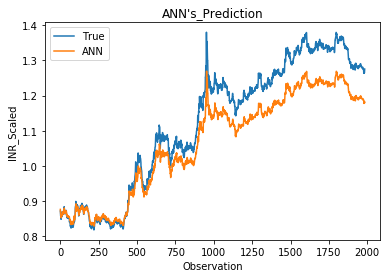

In [155]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

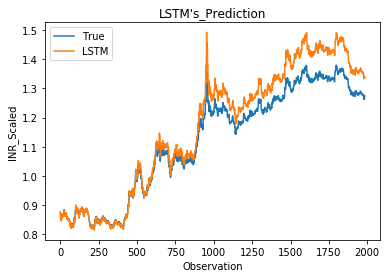

In [156]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()